In [1]:
# Load all libraries

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge



from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams["figure.figsize"] = (8, 6)


In [2]:
# df - train dataset
# sub - test dataset

df = pd.read_csv('C:/datasets/house-prices-advanced-regression-techniques/train.csv')
sub = pd.read_csv('C:/datasets/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df = df.drop('Id',axis=1)
sub = sub.drop('Id',axis=1)

In [4]:
# let's check our features
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# delete empty feature - MiscVal
df = df.drop('MiscFeature', axis=1)
sub = sub.drop('MiscFeature', axis=1)

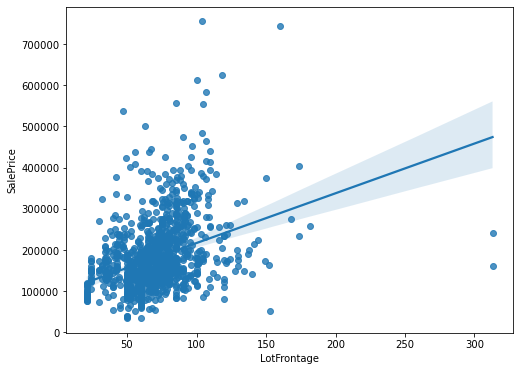

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

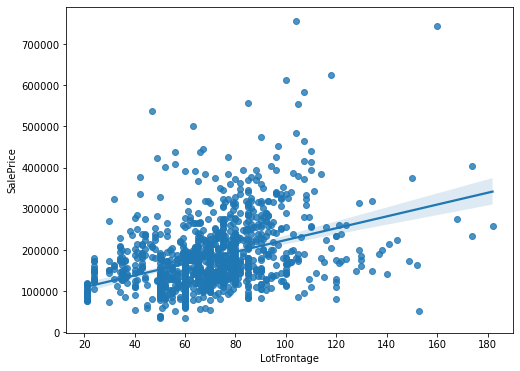

In [6]:
# get rid of abnormal outliers that makes noises to correlation
sns.regplot(data=df, x='LotFrontage', y='SalePrice')
plt.show()
# drop 2 data points from dataset
df = df.drop(df[df['LotFrontage'] > 300].index, axis=0)
sns.regplot(data=df, x='LotFrontage', y='SalePrice')

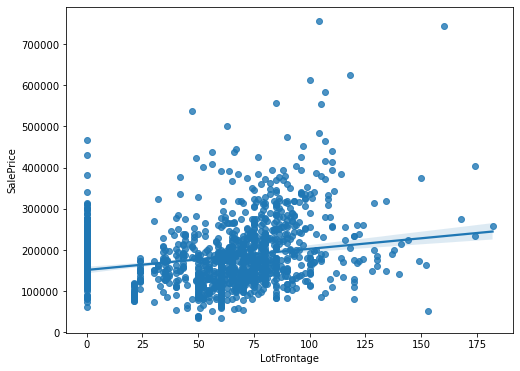

C:\Users\TimK\AppData\Local\Temp\ipykernel_7004\3892903727.py:90: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(LotFrontage_filler['LotFrontage'].append(put_to['LotFrontage'],


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

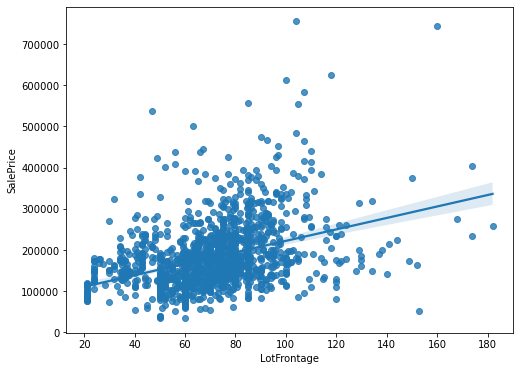

In [7]:
# filling empty information in LotFrontage with zeros and then implementing KNN imputation in order to approximate right correlation
df['LotFrontage'] = df['LotFrontage'].fillna(0)
sub['LotFrontage'] = sub['LotFrontage'].fillna(0)

sns.regplot(data=df, x='LotFrontage', y='SalePrice')
plt.show()

LotFrontage_filler = df.drop(list(df[df['LotFrontage'] == 0].index), axis=0)

LotFrontage_begin = df.drop(list(df[df['LotFrontage'] != 0].index), axis=0)

X_LotFrontage_final = LotFrontage_filler.drop('LotFrontage', axis=1)

y_LotFrontage_final = LotFrontage_filler['LotFrontage']

X_LotFrontage_to_insert = LotFrontage_begin.drop('LotFrontage', axis=1)

X_LotFrontage_final = pd.get_dummies(X_LotFrontage_final)
X_LotFrontage_to_insert_final = pd.get_dummies(X_LotFrontage_to_insert)

train_cols = X_LotFrontage_final.columns
test_cols = X_LotFrontage_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_LotFrontage_final = X_LotFrontage_final.drop(list(train_not_test),axis=1)

train_cols = X_LotFrontage_to_insert_final.columns
test_cols = X_LotFrontage_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_LotFrontage_to_insert_final = X_LotFrontage_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_LotFrontage_final)

old_ind = X_LotFrontage_final.index

X_LotFrontage_final = imp.transform(X_LotFrontage_final)

X_LotFrontage_final = pd.DataFrame(X_LotFrontage_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_LotFrontage_final = X_LotFrontage_final.rename(columns={i:featnam[i]})

X_LotFrontage_final['index1'] = old_ind
X_LotFrontage_final = X_LotFrontage_final.set_index('index1')

X_LotFrontage_final.index.name = None

old_ind = X_LotFrontage_to_insert_final.index
X_LotFrontage_to_insert_final= imp.transform(X_LotFrontage_to_insert_final)

X_LotFrontage_to_insert_final= pd.DataFrame(X_LotFrontage_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_LotFrontage_to_insert_final = X_LotFrontage_to_insert_final.rename(columns={i:featnam[i]})

X_LotFrontage_to_insert_final['index1'] = old_ind
X_LotFrontage_to_insert_final = X_LotFrontage_to_insert_final.set_index('index1')

X_LotFrontage_to_insert_final.index.name = None


X_LotFrontage_final = X_LotFrontage_final.drop('SalePrice', axis=1)
X_LotFrontage_to_insert_final = X_LotFrontage_to_insert_final.drop('SalePrice', axis=1)
X_LotFrontage_train, X_LotFrontage_test, y_LotFrontage_train, y_LotFrontage_test = train_test_split(X_LotFrontage_final, y_LotFrontage_final, test_size=0.2, random_state=17)

linreg = KNeighborsRegressor()
linreg.fit(X_LotFrontage_train, y_LotFrontage_train)

linreg.score(X_LotFrontage_test, y_LotFrontage_test)

# print(f"mean_absolute_error {mean_absolute_error(y_LotFrontage_test, linreg.predict(X_LotFrontage_test))}")
# print(f"mean_squared_error {mean_squared_error(y_LotFrontage_test, linreg.predict(X_LotFrontage_test))}")
# print(f"r2_score {r2_score(y_LotFrontage_test, linreg.predict(X_LotFrontage_test))}")

put_to = pd.DataFrame(linreg.predict(X_LotFrontage_to_insert_final))

put_to['index1'] = LotFrontage_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'LotFrontage'})
put_to.index.name = None

LotFrontage_final = LotFrontage_begin.copy()

conc = pd.DataFrame(LotFrontage_filler['LotFrontage'].append(put_to['LotFrontage'], 
                  ignore_index = False),columns=['LotFrontage'])

conc = conc.sort_index(axis=0)

df['LotFrontage'] = conc['LotFrontage']

sns.regplot(data=df, x='LotFrontage', y='SalePrice')

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


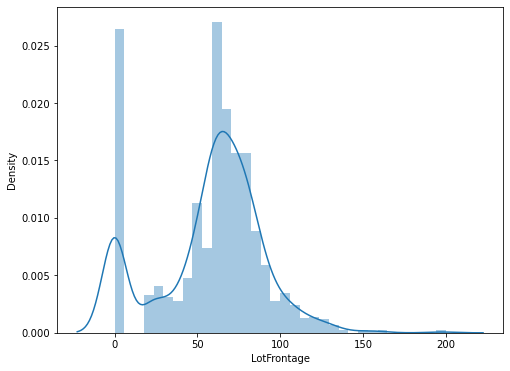

C:\Users\TimK\AppData\Local\Temp\ipykernel_7004\3336628820.py:86: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(LotFrontage_filler['LotFrontage'].append(put_to['LotFrontage'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

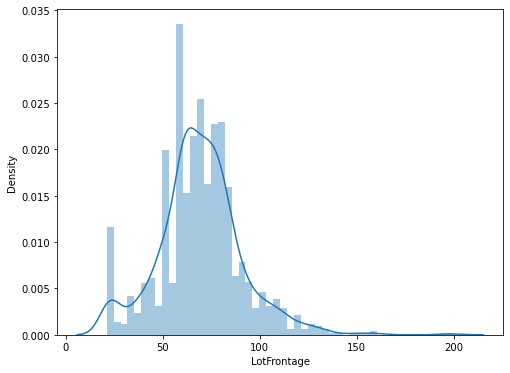

In [8]:
# same method with test dataset, we implement imputation and check distribution before and after

sns.distplot(sub['LotFrontage'])
plt.show()

LotFrontage_filler = sub.drop(list(sub[sub['LotFrontage'] == 0].index), axis=0)

LotFrontage_begin = sub.drop(list(sub[sub['LotFrontage'] != 0].index), axis=0)

X_LotFrontage_final = LotFrontage_filler.drop('LotFrontage', axis=1)

y_LotFrontage_final = LotFrontage_filler['LotFrontage']

X_LotFrontage_to_insert = LotFrontage_begin.drop('LotFrontage', axis=1)

X_LotFrontage_final = pd.get_dummies(X_LotFrontage_final)
X_LotFrontage_to_insert_final = pd.get_dummies(X_LotFrontage_to_insert)

train_cols = X_LotFrontage_final.columns
test_cols = X_LotFrontage_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_LotFrontage_final = X_LotFrontage_final.drop(list(train_not_test),axis=1)

train_cols = X_LotFrontage_to_insert_final.columns
test_cols = X_LotFrontage_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_LotFrontage_to_insert_final = X_LotFrontage_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_LotFrontage_final)

old_ind = X_LotFrontage_final.index

X_LotFrontage_final = imp.transform(X_LotFrontage_final)

X_LotFrontage_final = pd.DataFrame(X_LotFrontage_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_LotFrontage_final = X_LotFrontage_final.rename(columns={i:featnam[i]})

X_LotFrontage_final['index1'] = old_ind
X_LotFrontage_final = X_LotFrontage_final.set_index('index1')

X_LotFrontage_final.index.name = None

old_ind = X_LotFrontage_to_insert_final.index
X_LotFrontage_to_insert_final= imp.transform(X_LotFrontage_to_insert_final)

X_LotFrontage_to_insert_final= pd.DataFrame(X_LotFrontage_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_LotFrontage_to_insert_final = X_LotFrontage_to_insert_final.rename(columns={i:featnam[i]})

X_LotFrontage_to_insert_final['index1'] = old_ind
X_LotFrontage_to_insert_final = X_LotFrontage_to_insert_final.set_index('index1')

X_LotFrontage_to_insert_final.index.name = None


X_LotFrontage_train, X_LotFrontage_test, y_LotFrontage_train, y_LotFrontage_test = train_test_split(X_LotFrontage_final, y_LotFrontage_final, test_size=0.2, random_state=17)

linreg = KNeighborsRegressor()
linreg.fit(X_LotFrontage_train, y_LotFrontage_train)

linreg.score(X_LotFrontage_test, y_LotFrontage_test)

# print(f"mean_absolute_error {mean_absolute_error(y_LotFrontage_test, linreg.predict(X_LotFrontage_test))}")
# print(f"mean_squared_error {mean_squared_error(y_LotFrontage_test, linreg.predict(X_LotFrontage_test))}")
# print(f"r2_score {r2_score(y_LotFrontage_test, linreg.predict(X_LotFrontage_test))}")

put_to = pd.DataFrame(linreg.predict(X_LotFrontage_to_insert_final))

put_to['index1'] = LotFrontage_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'LotFrontage'})
put_to.index.name = None

LotFrontage_final = LotFrontage_begin.copy()

conc = pd.DataFrame(LotFrontage_filler['LotFrontage'].append(put_to['LotFrontage'], 
                  ignore_index = False),columns=['LotFrontage'])

conc = conc.sort_index(axis=0)

sub['LotFrontage'] = conc['LotFrontage']

sns.distplot(sub['LotFrontage'])

In [9]:
# formatting dtypes for datasets
df_types = pd.DataFrame(df.drop(['SalePrice'],axis=1).dtypes).reset_index().rename(columns={'index':'columns', 0:'dtypes'})
df_types['dtypes'] = df_types['dtypes'].astype(str)
sub_types = pd.DataFrame(sub.dtypes).reset_index().rename(columns={'index':'columns', 0:'dtypes'})
sub_types['dtypes'] = sub_types['dtypes'].astype(str)
lst_of_diff_types = []
for i in range(df_types.shape[0]):
    if list(df_types.iloc[i].values) != list(sub_types.iloc[i].values):
        lst_of_diff_types.append(df_types.iloc[i].values[0]) 
df[lst_of_diff_types] = df[lst_of_diff_types].astype(np.float64)
print(lst_of_diff_types)

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']


In [10]:
# comparing if some object features are not the same for both datasets
df_types = pd.DataFrame(df.drop('SalePrice',axis=1).dtypes).reset_index().rename(columns={'index':'columns', 0:'dtypes'})
df_types['dtypes'] = df_types['dtypes'].astype(str)
sub_types = pd.DataFrame(sub.dtypes).reset_index().rename(columns={'index':'columns', 0:'dtypes'})
sub_types['dtypes'] = sub_types['dtypes'].astype(str)
count = 0
for i in range(0,df_types[df_types['dtypes'] == 'object']['columns'].shape[0]):
    if df_types[df_types['dtypes'] == 'object']['columns'].iloc[i] != sub_types[sub_types['dtypes'] == 'object']['columns'].iloc[i]:
        count = +1
if df_types[df_types['dtypes'] == 'object']['columns'].shape[0] == sub_types[sub_types['dtypes'] == 'object']['columns'].shape[0] and count == 0:
    print('all object columns are the same')

all object columns are the same


In [11]:
# checking difference in values between two datasets by comparing two sets of values of each column
dic = dict()
for col in df_types[df_types['dtypes'] == 'object']['columns'].tolist():
    dic[col] = str(set(sub[col].unique().tolist()) - set(df[col].unique().tolist()))
# we found only NaN values, so we have to SimpleImpute all categorical data

In [12]:
for key, value in dic.items():
    if value == '{nan}':
        print(key, value)

MSZoning {nan}
Utilities {nan}
Exterior1st {nan}
Exterior2nd {nan}
KitchenQual {nan}
Functional {nan}
SaleType {nan}


In [13]:
# filling missing values with No category, according to description of dataset NaN values of these columns are meant to be No Category
df['Alley'] = df['Alley'].fillna('NoAll')
sub['Alley'] = sub['Alley'].fillna('NoAll')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFire')
sub['FireplaceQu'] = sub['FireplaceQu'].fillna('NoFire')
df['PoolQC'] = df['PoolQC'].fillna('NoPool')
sub['PoolQC'] = sub['PoolQC'].fillna('NoPool')
df['Fence'] = df['Fence'].fillna('NoFence')
sub['Fence'] = sub['Fence'].fillna('NoFence')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
sub['MasVnrType'] = sub['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
sub['BsmtQual'] = sub['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
sub['BsmtCond'] = sub['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
sub['BsmtExposure'] = sub['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
sub['BsmtFinType1'] = sub['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
sub['BsmtFinType2'] = sub['BsmtFinType2'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
sub['GarageType'] = sub['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
sub['GarageFinish'] = sub['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
sub['GarageQual'] = sub['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')
sub['GarageCond'] = sub['GarageCond'].fillna('None')

df = df.drop(df[df['Electrical'].isna() == True].index, axis=0)

In [14]:
list_of_categorical_columns = df.dtypes[(df.dtypes) == 'object'].index.tolist()
list_of_numerical_columns = df.dtypes[(df.dtypes) != 'object'].index.tolist()

In [15]:
# checking NaNs of categories DF
df[df.dtypes[(df.dtypes) == 'object'].index.tolist()].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
SaleType         0
SaleCondition    0
dtype: int64

In [16]:
# imputation of insignifficant nans in sub 
for col in (sub.dtypes[sub.isna().sum()[sub.isna().sum() > 0].index][sub.dtypes[sub.isna().sum()[sub.isna().sum() > 0].index] == 'object']).index:
    sub[col] = sub[col].fillna(list(sub[col].mode())[0])

In [17]:
# checking NaNs of categories in sub
sub[sub.dtypes[(sub.dtypes) == 'object'].index.tolist()].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
SaleType         0
SaleCondition    0
dtype: int64

In [18]:
# OneHotEncoding categorical data to get rid of text info for TRAIN DATA
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[list_of_categorical_columns])
transformed = pd.DataFrame(transformed.toarray())

for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i])})
df = df.reset_index()
df = df.drop(list_of_categorical_columns, axis=1)
for col in transformed.columns:
    df[col] = transformed[col].copy() 
df = df.drop('index', axis=1)

In [23]:
df.isna().sum()[df.isna().sum() > 0]

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [24]:
# OneHotEncoding categorical data to get rid of text info for TEST DATA
transformed = ohe.transform(sub[list_of_categorical_columns])
transformed = pd.DataFrame(transformed.toarray())

for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i])})
    
sub = sub.reset_index()

sub = sub.drop(list_of_categorical_columns, axis=1)

for col in transformed.columns:
    sub[col] = transformed[col].copy() 

sub = sub.drop('index', axis=1)

In [27]:
# imputing insignifficant amount of NaN values with median values
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
sub['MasVnrArea'] = sub['MasVnrArea'].fillna(sub['MasVnrArea'].median())

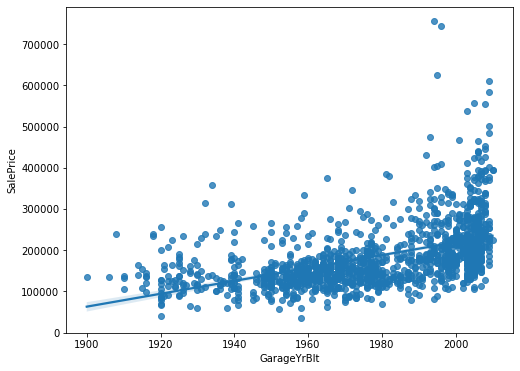

mean_absolute_error 15.482608695652177
mean_squared_error 436.1817391304346
r2_score 0.2820435174810798


C:\Users\TimK\AppData\Local\Temp\ipykernel_7004\1546889784.py:87: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(GarageYrBlt_filler['GarageYrBlt'].append(put_to['GarageYrBlt'],


<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

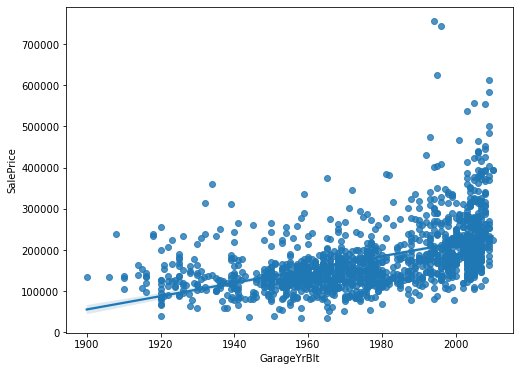

In [28]:
# Regression Imputation on df['GarageYrBlt']
sns.regplot(data=df, x='GarageYrBlt', y='SalePrice')
plt.show()

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(-537)
GarageYrBlt_filler = df.drop(list(df[df['GarageYrBlt'] == (-537)].index), axis=0)

GarageYrBlt_begin = df.drop(list(df[df['GarageYrBlt'] != (-537)].index), axis=0)

X_GarageYrBlt_final = GarageYrBlt_filler.drop('GarageYrBlt', axis=1)

y_GarageYrBlt_final = GarageYrBlt_filler['GarageYrBlt']

X_GarageYrBlt_to_insert = GarageYrBlt_begin.drop('GarageYrBlt', axis=1)

X_GarageYrBlt_final = pd.get_dummies(X_GarageYrBlt_final)
X_GarageYrBlt_to_insert_final = pd.get_dummies(X_GarageYrBlt_to_insert)

train_cols = X_GarageYrBlt_final.columns
test_cols = X_GarageYrBlt_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_GarageYrBlt_final = X_GarageYrBlt_final.drop(list(train_not_test),axis=1)

train_cols = X_GarageYrBlt_to_insert_final.columns
test_cols = X_GarageYrBlt_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_GarageYrBlt_to_insert_final = X_GarageYrBlt_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_GarageYrBlt_final)

old_ind = X_GarageYrBlt_final.index

X_GarageYrBlt_final = imp.transform(X_GarageYrBlt_final)

X_GarageYrBlt_final = pd.DataFrame(X_GarageYrBlt_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_GarageYrBlt_final = X_GarageYrBlt_final.rename(columns={i:featnam[i]})

X_GarageYrBlt_final['index1'] = old_ind
X_GarageYrBlt_final = X_GarageYrBlt_final.set_index('index1')

X_GarageYrBlt_final.index.name = None

old_ind = X_GarageYrBlt_to_insert_final.index
X_GarageYrBlt_to_insert_final= imp.transform(X_GarageYrBlt_to_insert_final)

X_GarageYrBlt_to_insert_final= pd.DataFrame(X_GarageYrBlt_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_GarageYrBlt_to_insert_final = X_GarageYrBlt_to_insert_final.rename(columns={i:featnam[i]})

X_GarageYrBlt_to_insert_final['index1'] = old_ind
X_GarageYrBlt_to_insert_final = X_GarageYrBlt_to_insert_final.set_index('index1')

X_GarageYrBlt_to_insert_final.index.name = None


X_GarageYrBlt_final = X_GarageYrBlt_final.drop('SalePrice', axis=1)
X_GarageYrBlt_to_insert_final = X_GarageYrBlt_to_insert_final.drop('SalePrice', axis=1)
X_GarageYrBlt_train, X_GarageYrBlt_test, y_GarageYrBlt_train, y_GarageYrBlt_test = train_test_split(X_GarageYrBlt_final, y_GarageYrBlt_final, test_size=0.2, random_state=17)

linreg = KNeighborsRegressor()
linreg.fit(X_GarageYrBlt_train, y_GarageYrBlt_train)

linreg.score(X_GarageYrBlt_test, y_GarageYrBlt_test)

print(f"mean_absolute_error {mean_absolute_error(y_GarageYrBlt_test, linreg.predict(X_GarageYrBlt_test))}")
print(f"mean_squared_error {mean_squared_error(y_GarageYrBlt_test, linreg.predict(X_GarageYrBlt_test))}")
print(f"r2_score {r2_score(y_GarageYrBlt_test, linreg.predict(X_GarageYrBlt_test))}")

put_to = pd.DataFrame(linreg.predict(X_GarageYrBlt_to_insert_final))

put_to['index1'] = GarageYrBlt_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'GarageYrBlt'})
put_to.index.name = None

GarageYrBlt_final = GarageYrBlt_begin.copy()

conc = pd.DataFrame(GarageYrBlt_filler['GarageYrBlt'].append(put_to['GarageYrBlt'], 
                  ignore_index = False),columns=['GarageYrBlt'])

conc = conc.sort_index(axis=0)

df['GarageYrBlt'] = conc['GarageYrBlt']

sns.regplot(data=df, x='GarageYrBlt', y='SalePrice')

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


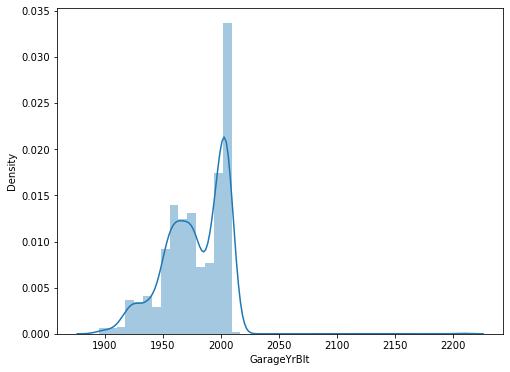

mean_absolute_error 16.412274368231053
mean_squared_error 477.9296750902529
r2_score 0.32730816769795046


C:\Users\TimK\AppData\Local\Temp\ipykernel_7004\3144814634.py:84: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(GarageYrBlt_filler['GarageYrBlt'].append(put_to['GarageYrBlt'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

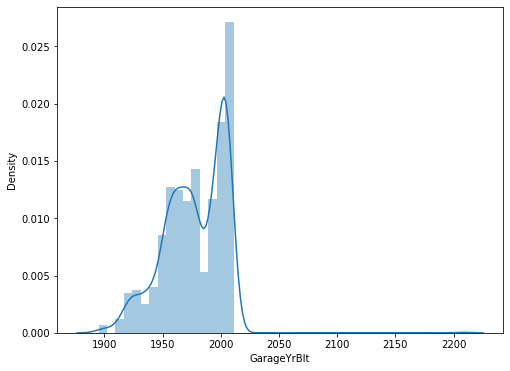

In [29]:
sns.distplot(sub['GarageYrBlt'])
plt.show()

sub['GarageYrBlt'] = sub['GarageYrBlt'].fillna(-537)
GarageYrBlt_filler = sub.drop(list(sub[sub['GarageYrBlt'] == (-537)].index), axis=0)

GarageYrBlt_begin = sub.drop(list(sub[sub['GarageYrBlt'] != (-537)].index), axis=0)

X_GarageYrBlt_final = GarageYrBlt_filler.drop('GarageYrBlt', axis=1)

y_GarageYrBlt_final = GarageYrBlt_filler['GarageYrBlt']

X_GarageYrBlt_to_insert = GarageYrBlt_begin.drop('GarageYrBlt', axis=1)

X_GarageYrBlt_final = pd.get_dummies(X_GarageYrBlt_final)
X_GarageYrBlt_to_insert_final = pd.get_dummies(X_GarageYrBlt_to_insert)

train_cols = X_GarageYrBlt_final.columns
test_cols = X_GarageYrBlt_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_GarageYrBlt_final = X_GarageYrBlt_final.drop(list(train_not_test),axis=1)

train_cols = X_GarageYrBlt_to_insert_final.columns
test_cols = X_GarageYrBlt_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_GarageYrBlt_to_insert_final = X_GarageYrBlt_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_GarageYrBlt_final)

old_ind = X_GarageYrBlt_final.index

X_GarageYrBlt_final = imp.transform(X_GarageYrBlt_final)

X_GarageYrBlt_final = pd.DataFrame(X_GarageYrBlt_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_GarageYrBlt_final = X_GarageYrBlt_final.rename(columns={i:featnam[i]})

X_GarageYrBlt_final['index1'] = old_ind
X_GarageYrBlt_final = X_GarageYrBlt_final.set_index('index1')

X_GarageYrBlt_final.index.name = None

old_ind = X_GarageYrBlt_to_insert_final.index
X_GarageYrBlt_to_insert_final= imp.transform(X_GarageYrBlt_to_insert_final)

X_GarageYrBlt_to_insert_final= pd.DataFrame(X_GarageYrBlt_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_GarageYrBlt_to_insert_final = X_GarageYrBlt_to_insert_final.rename(columns={i:featnam[i]})

X_GarageYrBlt_to_insert_final['index1'] = old_ind
X_GarageYrBlt_to_insert_final = X_GarageYrBlt_to_insert_final.set_index('index1')

X_GarageYrBlt_to_insert_final.index.name = None

X_GarageYrBlt_train, X_GarageYrBlt_test, y_GarageYrBlt_train, y_GarageYrBlt_test = train_test_split(X_GarageYrBlt_final, y_GarageYrBlt_final, test_size=0.2, random_state=17)

linreg = KNeighborsRegressor()
linreg.fit(X_GarageYrBlt_train, y_GarageYrBlt_train)

linreg.score(X_GarageYrBlt_test, y_GarageYrBlt_test)

print(f"mean_absolute_error {mean_absolute_error(y_GarageYrBlt_test, linreg.predict(X_GarageYrBlt_test))}")
print(f"mean_squared_error {mean_squared_error(y_GarageYrBlt_test, linreg.predict(X_GarageYrBlt_test))}")
print(f"r2_score {r2_score(y_GarageYrBlt_test, linreg.predict(X_GarageYrBlt_test))}")

put_to = pd.DataFrame(linreg.predict(X_GarageYrBlt_to_insert_final))

put_to['index1'] = GarageYrBlt_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'GarageYrBlt'})
put_to.index.name = None

GarageYrBlt_final = GarageYrBlt_begin.copy()

conc = pd.DataFrame(GarageYrBlt_filler['GarageYrBlt'].append(put_to['GarageYrBlt'], 
                  ignore_index = False),columns=['GarageYrBlt'])

conc = conc.sort_index(axis=0)

sub['GarageYrBlt'] = conc['GarageYrBlt']

sns.distplot(sub['GarageYrBlt'])

In [30]:
sub.isna().sum()[sub.isna().sum() > 0]

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
GarageArea      1
dtype: int64

In [31]:
# imputation with median for single missing values
for col in (sub.dtypes[sub.isna().sum()[sub.isna().sum() > 0].index][sub.dtypes[sub.isna().sum()[sub.isna().sum() > 0].index] == 'float64']).index:
    sub[col] = sub[col].fillna(sub[col].median())

In [32]:
# finally see no missing values
sub.isna().sum()[sub.isna().sum() > 0]

Series([], dtype: int64)

In [33]:
# Log Transformation of LotArea features, because of having big outliers and max-min scale
df['LotArea'] = np.log1p(df['LotArea'])
sub['LotArea'] = np.log1p(sub['LotArea'])

In [34]:
# Log Transformation of Target variable
df['SalePrice'] = np.log1p(df['SalePrice'])

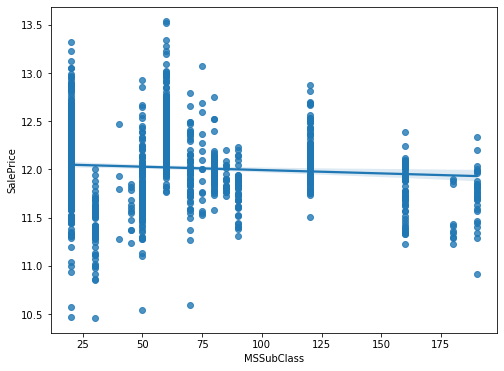

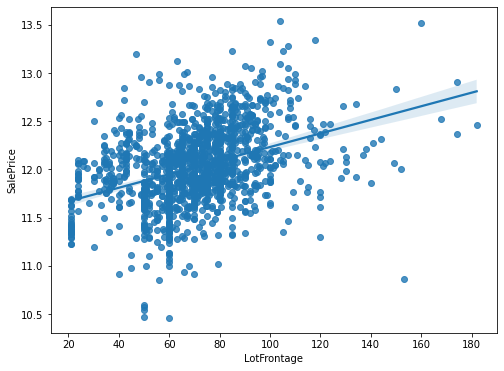

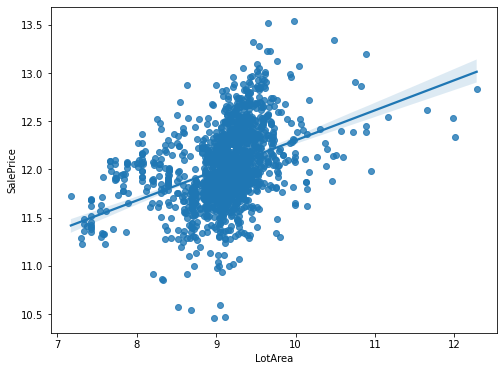

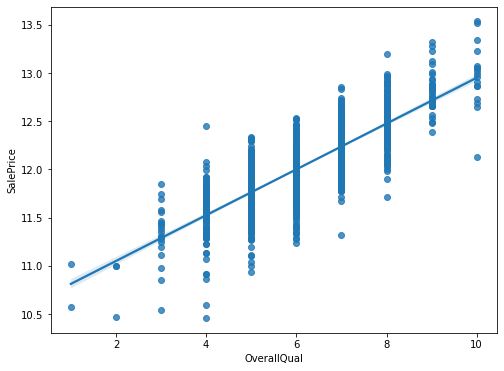

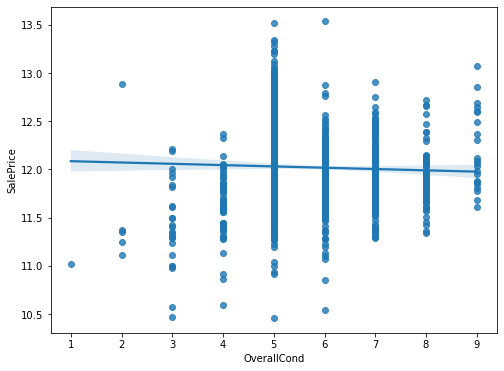

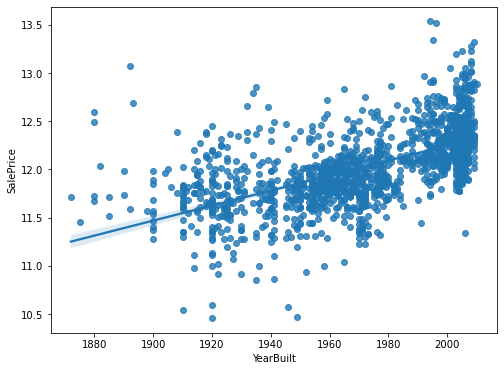

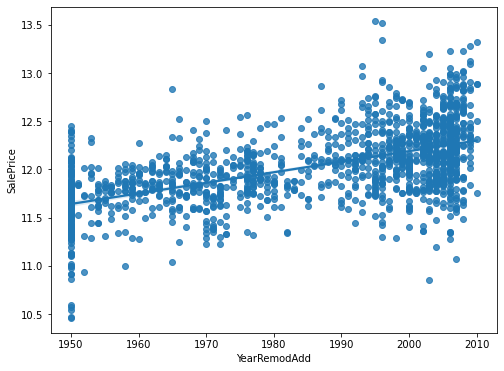

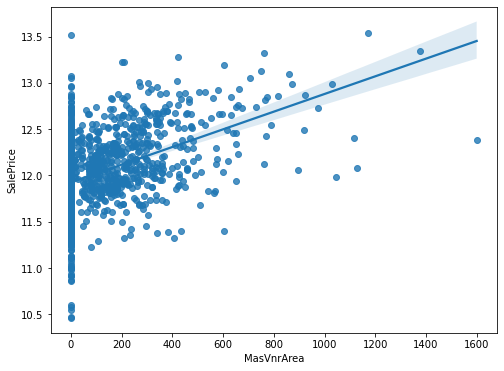

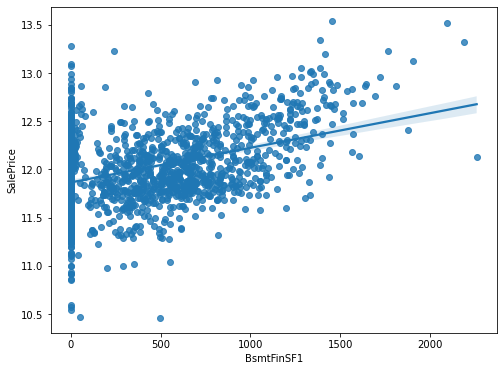

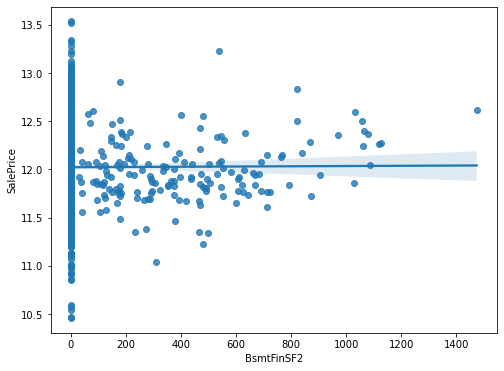

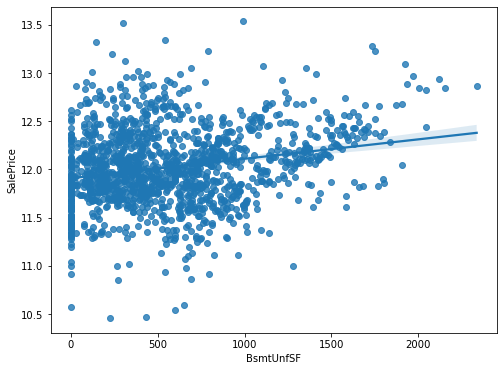

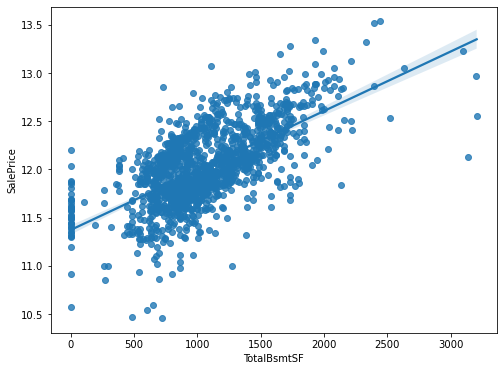

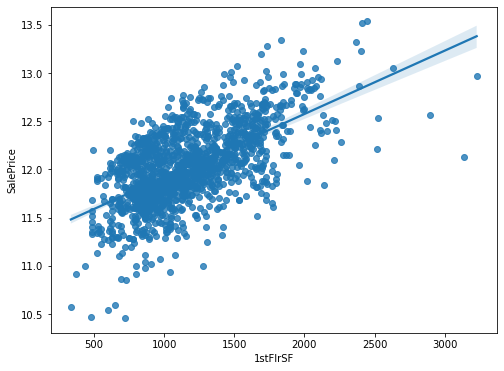

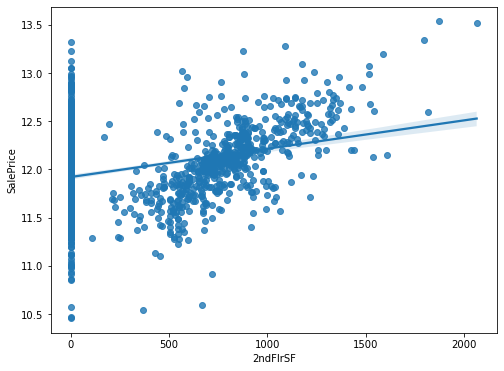

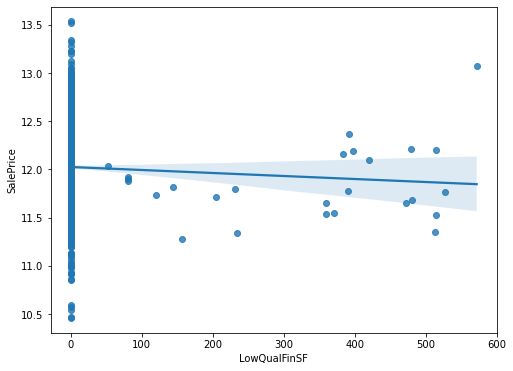

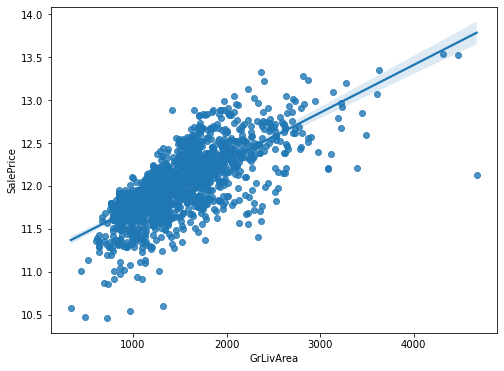

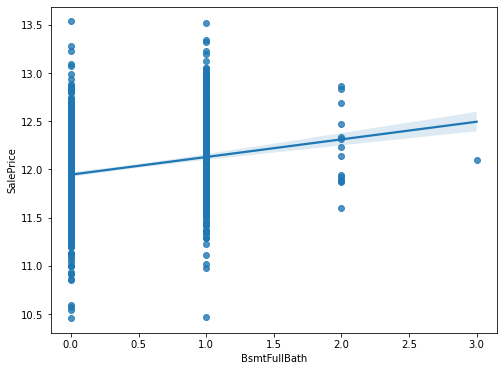

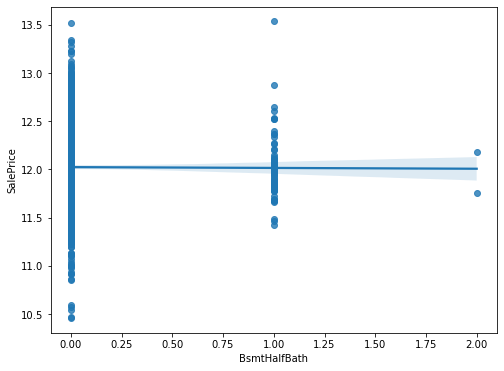

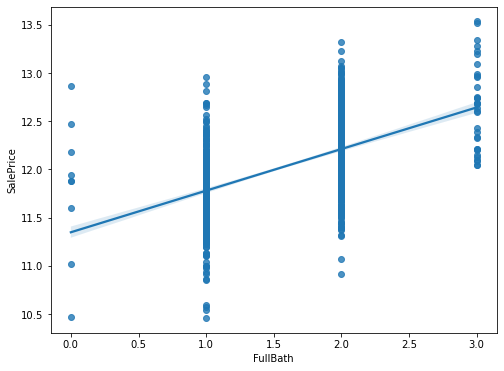

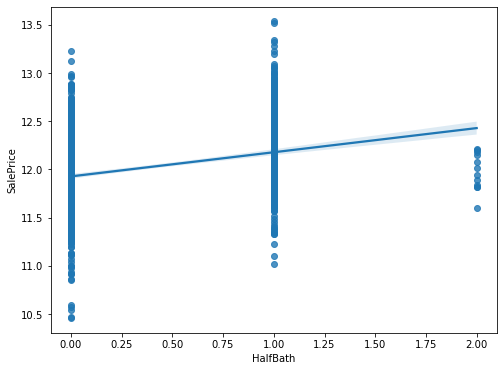

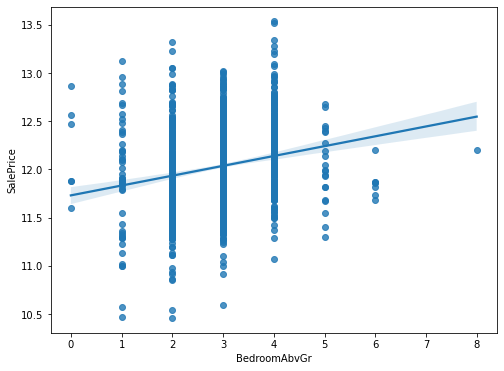

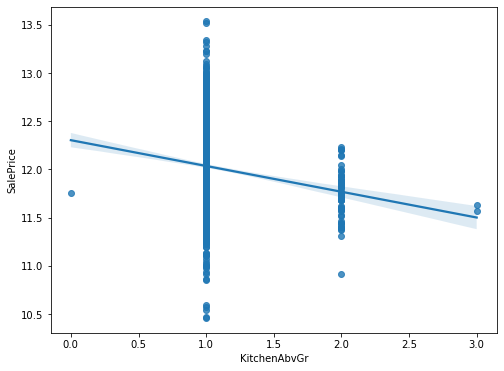

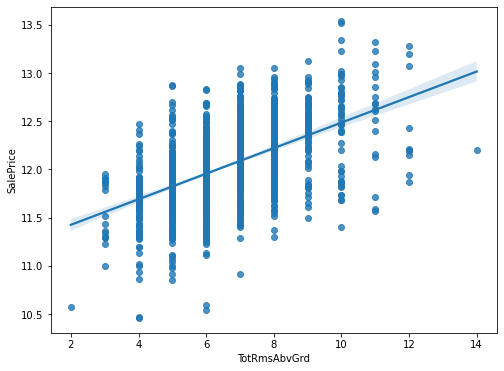

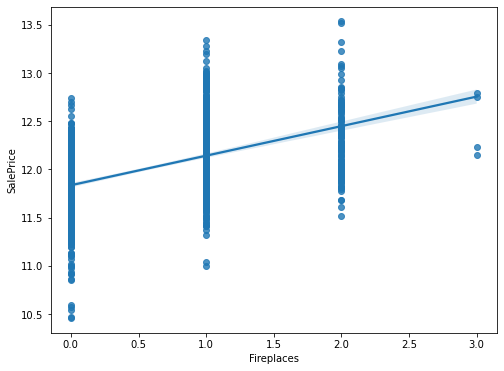

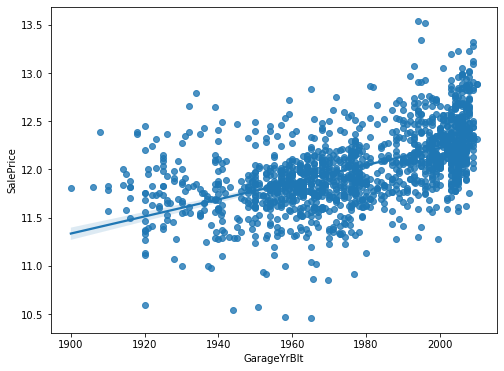

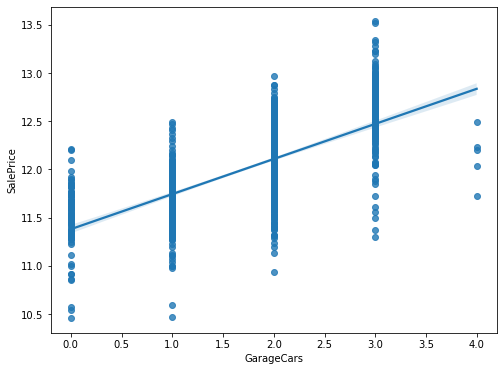

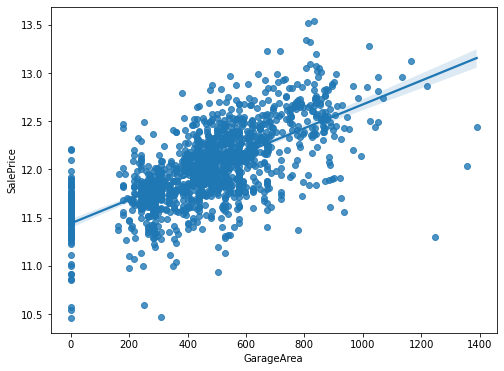

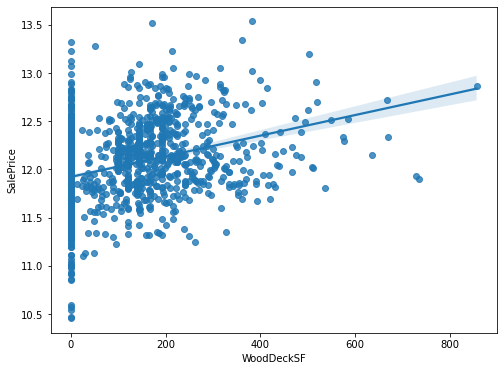

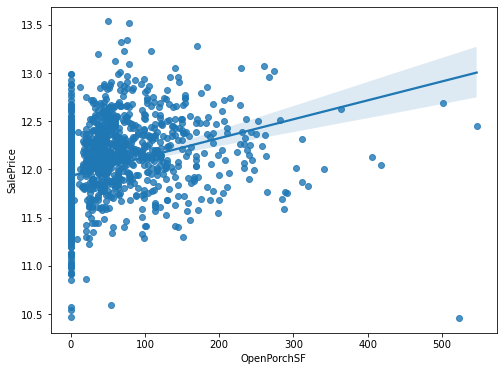

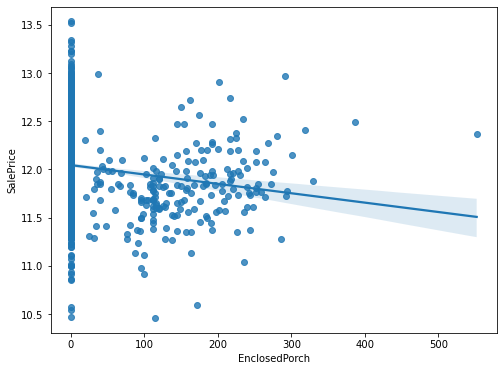

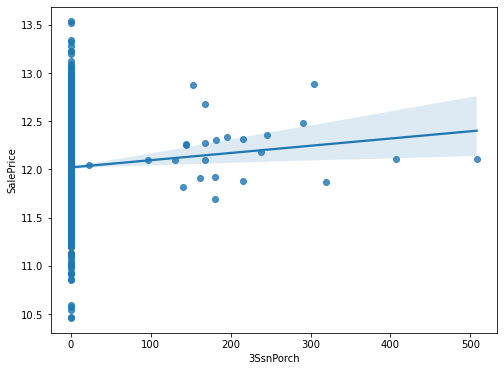

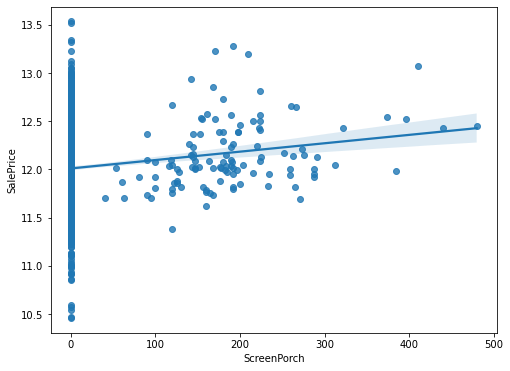

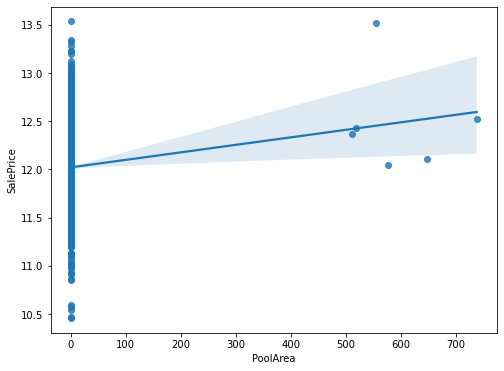

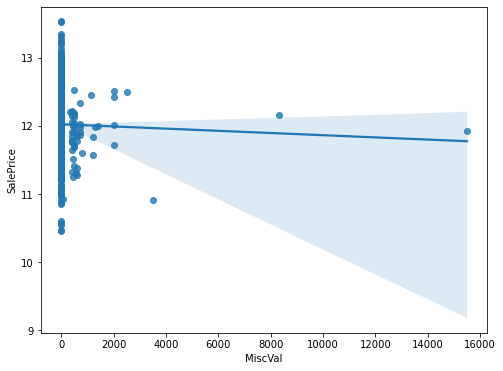

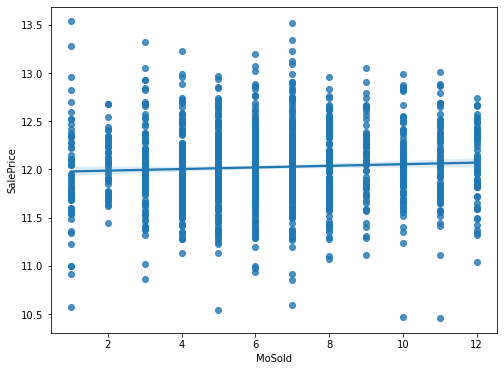

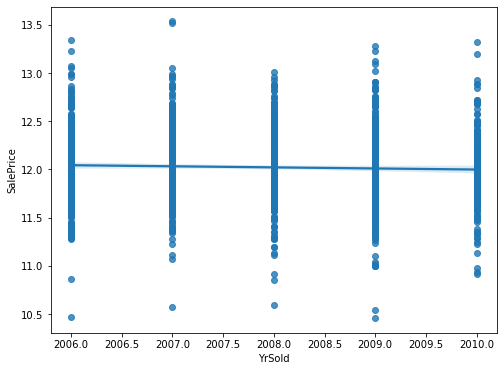

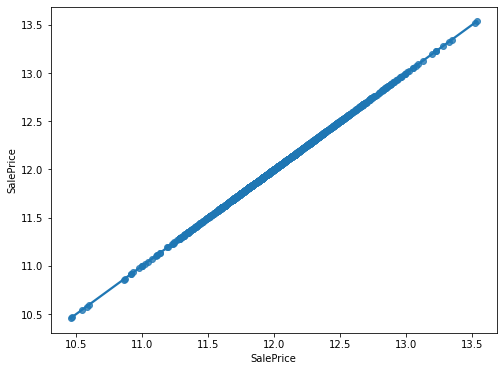

In [35]:
for col in list_of_numerical_columns:
    sns.regplot(data=df, x=col, y='SalePrice')
    plt.show()

In [36]:
y = df['SalePrice']
df = df.drop('SalePrice', axis=1)

In [37]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df)
# df_rescaled = scaler.transform(df)
# sub_rescaled = scaler.transform(sub)

In [38]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df_rescaled1)
# df_rescaled2 = scaler.transform(df_rescaled1)
# sub_rescaled2 = scaler.transform(sub_rescaled1)

In [39]:
# scores = pd.DataFrame()
# for rand_state in [17,42,32,12,1,2,3,4,5,125]:
#         X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=rand_state)
#         gd = GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.09, n_estimators = 338, subsample = 0.8, random_state=17)
#         gd.fit(X_train, y_train)
#         test_r2_score = r2_score(y_test, gd.predict(X_test))
#         test_MAE = mean_absolute_error(y_test, gd.predict(X_test))
#         test_RMSE = mean_squared_error(y_test, gd.predict(X_test), squared=False)
#         temp = pd.DataFrame({'random_state':[rand_state],'r2_score': [test_r2_score], 'MAE': [test_MAE], 'RMSE':[test_RMSE]})
#         scores = pd.concat([scores, temp])

In [47]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 15)

In [48]:
# Multicollinearity Analysis for future PCA decomposition in order to get rid of high correlation between features (>0.75)
df[(df.columns.tolist())[27:]].corr().sort_values('MSZoning_C (all)', ascending=False)

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSZoning_C (all),-0.055984,0.022487,0.082245,-0.009682,-0.007736,-0.005298,0.002984,...,-0.065921,0.140958,-0.004362,0.084406,-0.009807,-0.091239,-0.025355
Neighborhood_IDOTRR,-0.095607,-0.018886,0.160875,-0.018799,-0.019424,-0.010287,0.021983,...,0.011296,0.076178,-0.008469,0.033561,-0.019043,-0.015609,-0.049233
Street_Grvl,0.018010,0.005794,-0.023133,-0.007489,0.033127,-0.004098,0.022722,...,-0.006633,-0.017550,-0.003374,0.112724,-0.007586,0.002091,-0.019613
ExterQual_Fa,-0.044849,-0.052238,0.051313,-0.011471,-0.026645,-0.006277,0.049656,...,-0.024027,0.028517,-0.005168,0.068870,-0.011620,-0.009029,-0.030042
SaleType_ConLD,-0.039551,-0.030410,0.019339,-0.009182,-0.021326,-0.005024,0.002961,...,-0.202363,0.047459,-0.004137,-0.007184,-0.009301,-0.031702,0.007347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageType_Attchd,0.206574,0.106291,-0.173272,0.055509,0.043422,0.033758,-0.003511,...,-0.072841,-0.089036,-0.063694,-0.033254,-0.010997,-0.005510,0.115917
PavedDrive_Y,0.114726,0.031855,-0.202659,0.022976,0.047301,0.019093,-0.038593,...,-0.065050,-0.026357,-0.127421,-0.000322,0.035344,-0.035783,0.082427
MSZoning_RL,0.167777,-0.045311,-0.159578,0.051665,0.061976,0.033064,0.016679,...,0.016285,-0.063326,0.027221,-0.008454,-0.025374,0.046619,0.001792
CentralAir_Y,0.146012,0.025573,-0.156750,0.030758,0.051361,0.016831,-0.002430,...,-0.037140,-0.037373,-0.092405,-0.006692,-0.016628,-0.014629,0.080551


In [49]:
# PCA transformation, making new feature by adding new component, trying to minimize loss of information
pca_transform = PCA(n_components=1)
year_built_new_feature_df = pca_transform.fit_transform(df[['YearBuilt', 'GarageYrBlt']])

year_built_new_feature_df = pd.DataFrame(year_built_new_feature_df).rename(columns={0:'col'})

correlation = year_built_new_feature_df.col.corr(y) 

df = df.drop(['YearBuilt', 'GarageYrBlt'],axis=1)

df['year_built_new'] = year_built_new_feature_df.col

year_built_new_feature_sub = pca_transform.transform(sub[['YearBuilt', 'GarageYrBlt']])

year_built_new_feature_sub = pd.DataFrame(year_built_new_feature_sub).rename(columns={0:'col'})

sub = sub.drop(['YearBuilt', 'GarageYrBlt'],axis=1)

sub['year_built_new'] = year_built_new_feature_sub.col

In [50]:
pca_transform = PCA(n_components=1)
bsmt_total_new_feature_df = pca_transform.fit_transform(df[['TotalBsmtSF', '1stFlrSF']])

bsmt_total_new_feature_df = pd.DataFrame(bsmt_total_new_feature_df).rename(columns={0:'col'})

correlation = bsmt_total_new_feature_df.col.corr(y) 

df = df.drop(['TotalBsmtSF', '1stFlrSF'],axis=1)

df['bsmt_total_new'] = bsmt_total_new_feature_df.col

bsmt_total_new_feature_sub = pca_transform.transform(sub[['TotalBsmtSF', '1stFlrSF']])

bsmt_total_new_feature_sub = pd.DataFrame(bsmt_total_new_feature_sub).rename(columns={0:'col'})

sub = sub.drop(['TotalBsmtSF', '1stFlrSF'],axis=1)

sub['bsmt_total_new'] = bsmt_total_new_feature_sub.col

In [51]:
pca_transform = PCA(n_components=1)
house_style_new_feature_df = pca_transform.fit_transform(df[['HouseStyle_2Story', '2ndFlrSF']])

house_style_new_feature_df = pd.DataFrame(house_style_new_feature_df).rename(columns={0:'col'})

correlation = house_style_new_feature_df.col.corr(y) 

df = df.drop(['HouseStyle_2Story', '2ndFlrSF'],axis=1)

df['house_style_new'] = house_style_new_feature_df.col

house_style_new_feature_sub = pca_transform.transform(sub[['HouseStyle_2Story', '2ndFlrSF']])

house_style_new_feature_sub = pd.DataFrame(house_style_new_feature_sub).rename(columns={0:'col'})

sub = sub.drop(['HouseStyle_2Story', '2ndFlrSF'],axis=1)

sub['house_style_new'] = house_style_new_feature_sub.col

In [52]:
pca_transform = PCA(n_components=1)
GrLivArea_total_new_feature_df = pca_transform.fit_transform(df[['GrLivArea','TotRmsAbvGrd']])

GrLivArea_total_new_feature_df = pd.DataFrame(GrLivArea_total_new_feature_df).rename(columns={0:'col'})

correlation = GrLivArea_total_new_feature_df.col.corr(y) 

df = df.drop(['GrLivArea','TotRmsAbvGrd'],axis=1)

df['GrLivArea_total_new'] = GrLivArea_total_new_feature_df.col

GrLivArea_total_new_feature_sub = pca_transform.transform(sub[['GrLivArea','TotRmsAbvGrd']])

GrLivArea_total_new_feature_sub = pd.DataFrame(GrLivArea_total_new_feature_sub).rename(columns={0:'col'})

sub = sub.drop(['GrLivArea','TotRmsAbvGrd'],axis=1)

sub['GrLivArea_total_new'] = GrLivArea_total_new_feature_sub.col

In [53]:
pca_transform = PCA(n_components=1)
Garage_total_new_feature_df = pca_transform.fit_transform(df[['GarageCars', 'GarageArea']])

Garage_total_new_feature_df = pd.DataFrame(Garage_total_new_feature_df).rename(columns={0:'col'})

correlation = Garage_total_new_feature_df.col.corr(y) 

df = df.drop(['GarageCars', 'GarageArea'],axis=1)

df['Garage_total_new'] = Garage_total_new_feature_df.col

Garage_total_new_feature_sub = pca_transform.transform(sub[['GarageCars', 'GarageArea']])

Garage_total_new_feature_sub = pd.DataFrame(Garage_total_new_feature_sub).rename(columns={0:'col'})

sub = sub.drop(['GarageCars', 'GarageArea'],axis=1)

sub['Garage_total_new'] = Garage_total_new_feature_sub.col

In [54]:
# training model with Gradient Boosting Algorithm with Cross-Validation

kfold= KFold(n_splits=10,random_state=42,shuffle=True) #kfold cross validation, 10-subsets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1,random_state=17)

gd = GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.09, n_estimators = 338, subsample = 0.8)
gd.fit(X_train, y_train)

gd.score(X_test, y_test)

print(f"mean_absolute_error {mean_absolute_error(y_test, gd.predict(X_test))}")
print(f"root_mean_squared_error {mean_squared_error(y_test, gd.predict(X_test), squared=False)}")
print(f"r2_score {r2_score(y_test, gd.predict(X_test))}")

parametrs = {'criterion':['friedman_mse'],'subsample': list(np.arange(0.1,1.1,0.1)) ,'learning_rate': list(np.arange(0.08, 0.11, 0.01)), 'n_estimators':[i for i in range(330,340,2)]}
gd_cv = GridSearchCV(GradientBoostingRegressor(),parametrs, n_jobs=-1, verbose=2, cv=kfold)

gd_cv.fit(X_train, y_train)

print(f"gd_cv.score: {gd_cv.score(X_test, y_test)}")

print(f"gd_cv.best_params_: {gd_cv.best_params_}")

print(f"gd_cv.best_estimator_: {gd_cv.best_estimator_}")

print(f"gd_cv.best_score_: {gd_cv.best_score_}")

print(f"mean_absolute_error {mean_absolute_error(y_test, gd_cv.predict(X_test))}")
print(f"root_mean_squared_error {mean_squared_error(y_test, gd_cv.predict(X_test), squared=False)}")
print(f"r2_score {r2_score(y_test, gd_cv.predict(X_test))}")



mean_absolute_error 0.08532919127764264
root_mean_squared_error 0.12851109121319715
r2_score 0.8987129594468144
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
gd_cv.score: 0.9010181795987331
gd_cv.best_params_: {'criterion': 'friedman_mse', 'learning_rate': 0.08, 'n_estimators': 334, 'subsample': 0.6}
gd_cv.best_estimator_: GradientBoostingRegressor(learning_rate=0.08, n_estimators=334, subsample=0.6)
gd_cv.best_score_: 0.9030973029369577
mean_absolute_error 0.08412859417592775
root_mean_squared_error 0.12704026432993543
r2_score 0.9010181795987331


In [57]:
# write submission results for Kaggle
predictions = np.expm1(gd_cv.predict(sub))

submission = pd.read_csv('C:/datasets/house-prices-advanced-regression-techniques/sample_submission.csv')

submission['SalePrice'] = predictions

submission.to_csv('C:/datasets/house-prices-advanced-regression-techniques/result1.csv', index=False)

pd.read_csv('C:/datasets/house-prices-advanced-regression-techniques/result1.csv')

,Id,SalePrice
0,1461,128675.446997
1,1462,163248.397575
2,1463,190976.913220
3,1464,199893.137354
4,1465,179284.940812
...,...,...
1454,2915,78583.738605
1455,2916,81712.398689
1456,2917,189797.063630
1457,2918,111720.899094


In [56]:
# kfold= KFold(n_splits=10,random_state=42,shuffle=True) #kfold cross validation
# from sklearn.linear_model import LassoCV
# alphas_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008] #Best value of alpha parmaters for lasso
# lasso =LassoCV(alphas=alphas_lasso, cv=kfold)
# lasso.fit(X_train, y_train)
# print(f"mean_absolute_error {mean_absolute_error(y_test, lasso.predict(X_test))}")
# print(f"root_mean_squared_error {mean_squared_error(y_test, lasso.predict(X_test), squared=False)}")
# print(f"r2_score {r2_score(y_test, lasso.predict(X_test))}")